___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
len(y_train)

60000

In [12]:
len(y_test)

10000

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [67]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

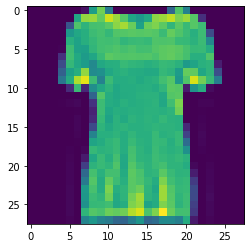

In [22]:
plt.imshow(x_train[10])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [24]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[9].min()

0.0

In [26]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [29]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[9]

5

In [36]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [44]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 28)        7084      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 28)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 700)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [48]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4759 - accuracy: 0.8274 - val_loss: 0.3625 - val_accuracy: 0.8705
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3231 - accuracy: 0.8817 - val_loss: 0.3176 - val_accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2769 - accuracy: 0.8992 - val_loss: 0.2877 - val_accuracy: 0.8943
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2532 - accuracy: 0.9074 - val_loss: 0.2998 - val_accuracy: 0.8950
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2358 - accuracy: 0.9147 - val_loss: 0.2747 - val_accuracy: 0.9032
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2231 - accuracy: 0.9193 - val_loss: 0.2721 - val_accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2130 - accuracy: 0.9225 - val_loss: 0.2871 -

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.475916,0.827450,0.362513,0.8705
1,0.323132,0.881750,0.317625,0.8849
2,0.276886,0.899217,0.287683,0.8943
3,0.253190,0.907367,0.299758,0.8950
4,0.235775,0.914683,0.274661,0.9032


**TASK 7: Plot values of metrics you used in your model.**

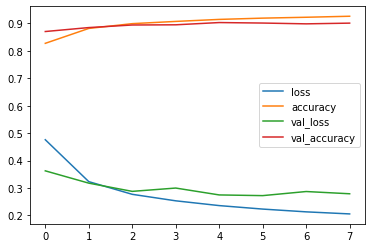

In [51]:
summary.plot();

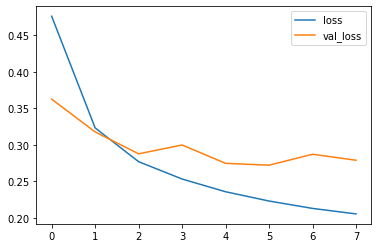

In [52]:
summary[["loss", "val_loss"]].plot();

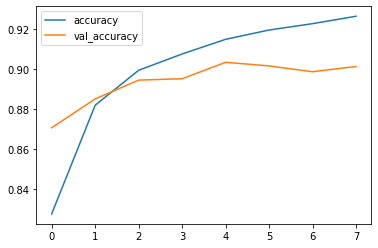

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.9014


[0.2721462547779083, 0.9014000296592712]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2721462547779083
Test accuracy: 0.9014000296592712


In [57]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[5.30246380e-09, 9.23819424e-11, 1.00634026e-08, ...,
        8.01145565e-04, 1.16828618e-08, 9.99130189e-01],
       [1.18530428e-04, 3.77204154e-13, 9.99246478e-01, ...,
        5.39736424e-15, 3.15473481e-11, 1.22196489e-11],
       [4.13888557e-07, 9.99999046e-01, 8.91201613e-10, ...,
        7.24571359e-16, 3.14898774e-10, 2.99952070e-15],
       ...,
       [5.71111300e-08, 8.79961988e-16, 5.79693271e-09, ...,
        7.69106241e-13, 9.99999762e-01, 2.64944154e-13],
       [1.81260273e-09, 9.99999881e-01, 1.51621320e-11, ...,
        9.19097914e-13, 1.12046180e-11, 1.61866018e-13],
       [9.19116021e-04, 8.57862688e-05, 1.50545815e-03, ...,
        4.27705646e-02, 5.19274082e-03, 1.23071636e-03]], dtype=float32)

In [58]:
pred_prob.shape

(10000, 10)

In [59]:
pred_prob[0]

array([5.30246380e-09, 9.23819424e-11, 1.00634026e-08, 3.22791860e-09,
       4.06650980e-09, 6.86125859e-05, 1.54135265e-08, 8.01145565e-04,
       1.16828618e-08, 9.99130189e-01], dtype=float32)

In [60]:
np.argmax(pred_prob[0])

9

## Prediction

In [61]:
my_number = X_test[3]

In [62]:
my_number.shape

(28, 28, 1)

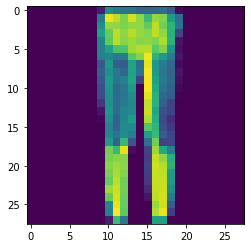

In [63]:
plt.imshow(my_number.reshape(28,28));

In [64]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 18ms/step


array([[2.1594802e-10, 1.0000000e+00, 4.7694276e-13, 6.8156442e-10,
        3.8241545e-11, 5.7537217e-16, 1.3657540e-11, 1.5114165e-16,
        8.5698855e-15, 1.5594229e-17]], dtype=float32)

In [65]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [68]:
classes[y_pred]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___